In [65]:
from PIL import Image
import numpy as np
import os
import scipy
from mpldatacursor import datacursor
from scipy import ndimage
import warnings,glob
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    %matplotlib nbagg
    import matplotlib.pyplot as plt
    import matplotlib
files = glob.glob("/Users/rein/Desktop/remote_june_7/resize_capt_multi_*.jpg")

<IPython.core.display.Javascript object>


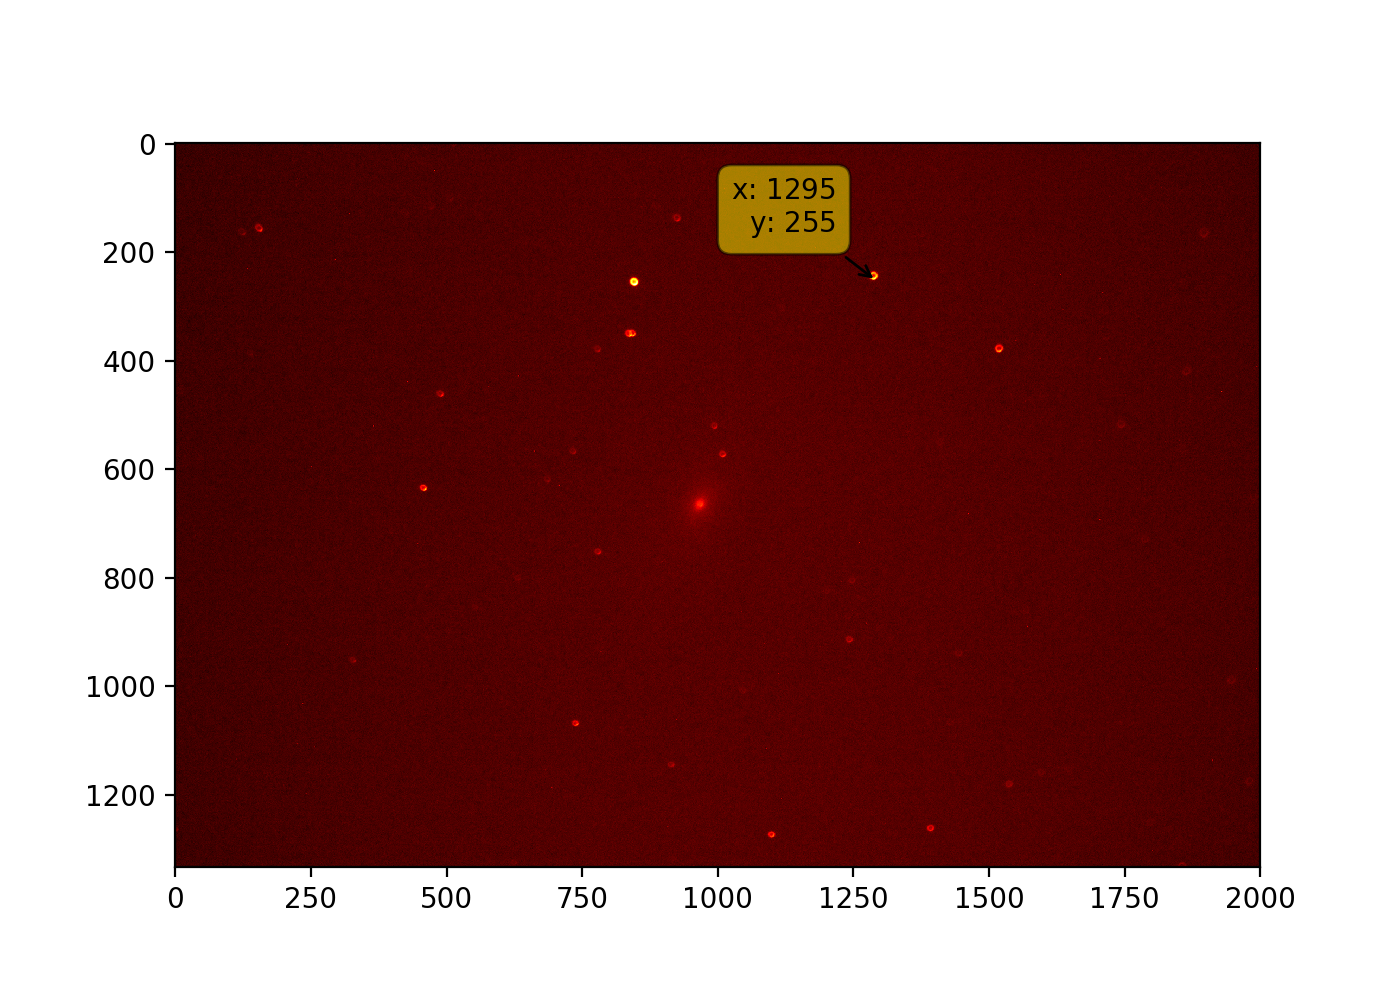

In [66]:
f = files[0]
refi = np.average(np.array(Image.open(f), dtype=np.float32),axis=2)
fig, ax = plt.subplots(figsize=(7,5))
ax.imshow(refi, cmap="hot")
dc = datacursor(ax)

In [67]:
for k in dc.annotations:
    ry, rx = dc.annotations[k].xy
    print(rx, ry)
radius = 150

255.055299539 1295.29493088


In [68]:
def cmask(x,y,radius,shape):
    nx,ny = shape
    y,x = np.ogrid[-x:nx-x,-y:ny-y]
    mask = x*x + y*y >= radius*radius
    return mask
mask = cmask(rx,ry,radius,refi.shape)
blurred = scipy.ndimage.filters.gaussian_filter(refi, sigma=10)
am = np.argmax(np.ma.masked_array(blurred,mask))
refx, refy = np.unravel_index(am,refi.shape)
print(refx,refy)

244 1287


In [70]:
s = refi.copy()
for f in files[1:]:
    i = np.average(np.array(Image.open(f), dtype=np.float32),axis=2)
    blurred = scipy.ndimage.filters.gaussian_filter(i, sigma=10)
    am = np.argmax(np.ma.masked_array(blurred,mask))
    ix, iy = np.unravel_index(am,i.shape)
    print(ix-refx,iy-refy)
    i = np.roll(i,-iy+refy,axis=1)
    i = np.roll(i,-ix+refx,axis=0)
    s += i

1 -1
1 0
2 1
2 4
3 3
3 2
3 3
4 5
4 7
4 5
5 6
5 7
5 10
6 9
6 8
7 9
7 11
7 13
8 11
16 27
17 25
17 26
17 28
18 30
18 28
19 28
19 29
19 32
20 32


In [71]:
vmin, vmax = np.percentile(s,5),np.percentile(s,99.9)

<IPython.core.display.Javascript object>


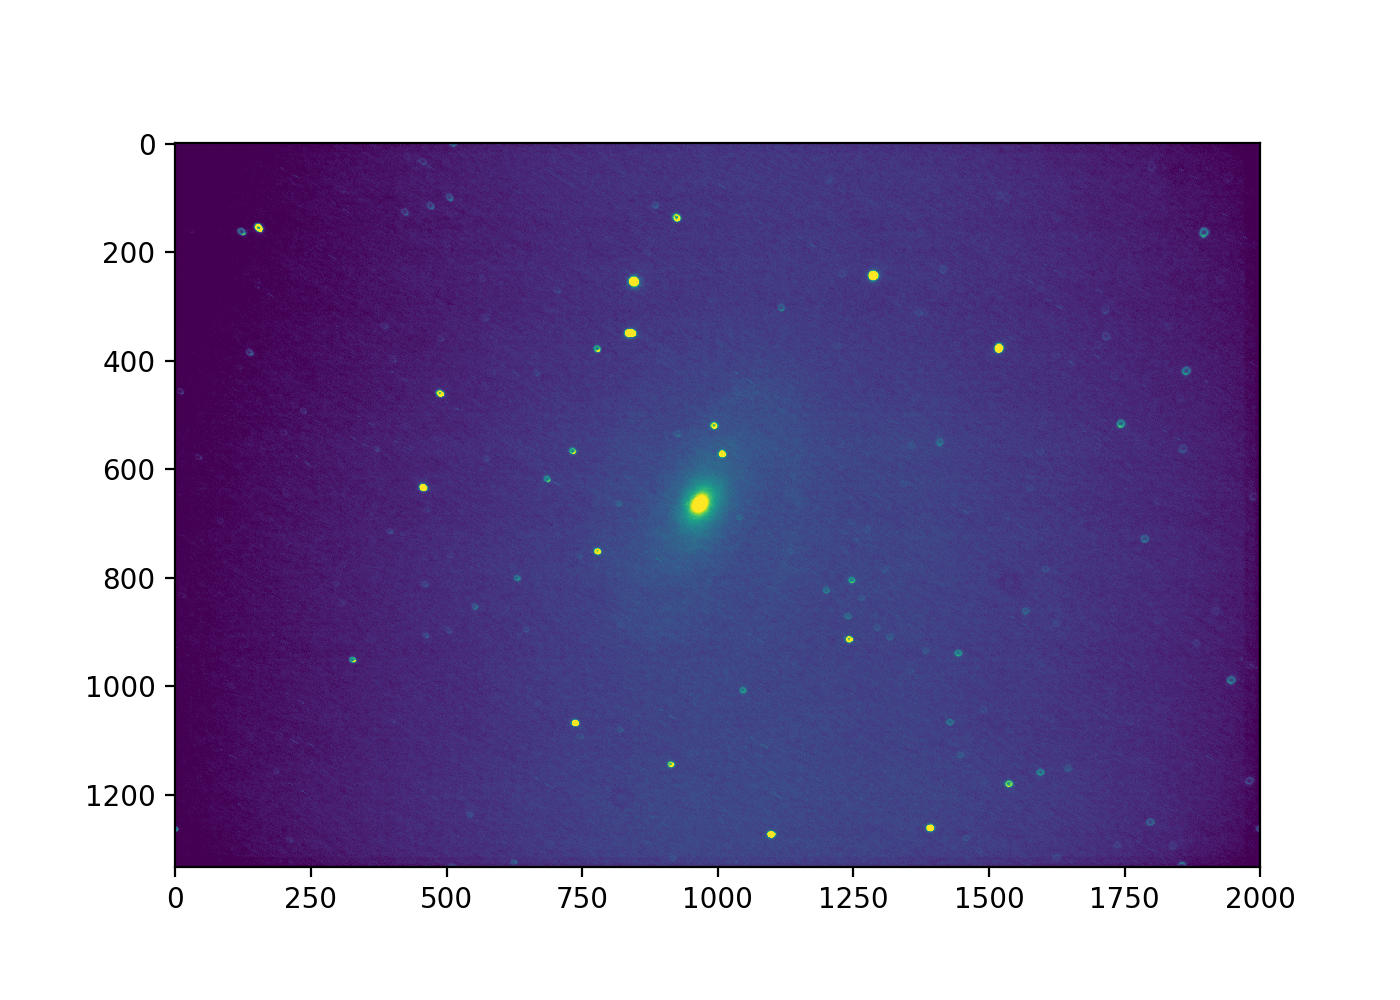

In [72]:
fig, ax = plt.subplots(figsize=(7,5))
ax.imshow(s, vmin=vmin,vmax=vmax)

In [139]:
scipy.misc.toimage(s, cmin=0.0, cmax=3000.).save('stacked.jpg')


In [20]:
np.percentile(s,5),np.percentile(s,99.99)

(959.33331298828125, 3200.0012155242753)